# Notæ 2

## Implementando grafos en Python

### Introducción


Muchos de los problemas de optimización que trabajamos en el grupo están directamente definidos sobre grafos o pueden modelarse mediante ellos. Por lo tanto, resulta indispensable aprender a construir grafos en python y a escribir formulaciones de PLE basadas en ellos, es decir, donde las variables y restricciones dependan de ciertas estructuras del grafo, como vértices, aristas, conjuntos estables, cliques, etc.

### Construcción de grafos

Existentes dos enfoques en computación para representar un grafo: matrices de adyacencias y listas de adyacencias. Usaremos como ejemplo un grafo camino $P_3$ con conjunto de vértices $\{0,1,2\}$ y conjunto de aristas $\{(0,1),(1,2)\}$. Es decir:

$\bullet - \bullet - \bullet$<br>
$0 ~~~~ 1 ~~~~ 2$<br>

<b>Definición 1.</b> Dado un grafo $G$, la <i>matriz de adyacencias</i> $M(G)$ es una matriz binaria de dimensión $n \times n$, donde $n$ es el número de vértices, tal que la entrada $M(G)_{ij}=1$ si y sólo si $i$ y $j$ son adyacentes en $G$.

<b>Ejemplo.</b>
\begin{equation}
M(P_3) = \left(\begin{matrix}
0 & 1 & 0\\
1 & 0 & 1 \\
0 & 1 & 0\\
\end{matrix}\right)
\end{equation}

<b>Observación.</b> Si $G$ es simple, entonces no tiene bucles y por lo tanto $M(G)$ tiene todos 0s en su diagonal.

<b>Definición 2.</b> Dado un grafo $G$ y un vértice $v$ de $G$, la <i>lista de adyacencias</i> de $v$ es una lista $L_v(G)$ que contiene a todos los vecinos de $v$.

<b>Ejemplo.</b>
$$ L_0(P_3) = [1] $$
$$ L_1(P_3) = [0,2] $$
$$ L_2(P_3) = [2] $$

Estas dos representaciones tienen sus ventajas/desventajas. Por ejemplo:
* En la matriz de adyacencias es muy sencillo determinar si dos vértices $u$ y $v$ son adyacentes, pues simplemente hay que ver si $M(G)_{uv} = 1$. En cambio, con las listas de adyacencias esto es un poco más costoso, ya que necesitamos, por ejemplo, recorrer iterativamente $L_u(G)$ y determinar si contiene o no a $v$. 
* En las listas de adyacencias es muy sencillo obtener los vecinos de un vértice $v$, simplemente es $L_v(G)$. En cambio, con la matriz de adyacencias es necesario iterar sobre la fila $v$ y seleccionar las columnas que tengan un 1 en su respectiva entrada.
* En general, almacenar la matriz de adyacencia puede ser muy costoso en memoria. Por ejemplo, un grafo de 10.000 vértices tiene una matriz de adyacencias con 100.000.000 entradas. Suponiendo que cada entrada ocupa 1 bit (un 0 o un 1), necesitaríamos 12.5 megabytes. En cambio, las listas de adyacencia suelen ser más eficiente en memoria, en particular cuando los grafos son poco densos.

Para poder manipular grafos en python, necesitamos elegir alguna de estas representaciones e implementar métodos para: obtener el número de vértices, el número de aristas, los grados de los vértices, decidir si dos vértices son adyacentes, etc etc etc... Es decir, ¡todos los métodos necesarios para trabajar con grafos!

<b>¡¡Por suerte estamos en python!! &#x1f973;&#x1f973; </b>

No vamos a reinventar la rueda... En python existen muchos paquetes que nos permiten construir y manipular grafos de una forma (más o menos) sencilla. En nuestro caso vamos a usar uno llamado <code>networkx</code>, pero existen muchos otros... Incluso es posible vincular python con <a href="https://doc.sagemath.org/html/en/reference/graphs/index.html">Sage</a> (software muy usado en teoría de grafos y en otras áreas), aunque esto es un poco más complicado y preferimos no complicar las cosas.



### Paquete NetworkX

Lo primero que tenemos que hacer es descargar el paquete <code>networkx</code>. Los usuarios de Windows pueden hacer los siguientes pasos:
<p><code>
En la consola, ir al directorio “\Miniconda\Scripts” y ejecutar el siguiente comando para instalar
paquetes:
&gt; E:
&gt; cd \Miniconda\Scripts
&gt; pip install networkx
</code></p>

Los usuarios con distribuciones de Linux:
<p><code>
En la consola, ejecutar el siguiente comando para instalar paquetes:
&gt; python3 -m pip install networkx
</code></p>

En caso de error, probar abrir la consola en modo administrador (Windows) o anteponer el comando sudo (Linux).

Una vez hecho esto, deberíamos ser capaces de ejecutar la siguiente celda, encargada de importar el paquete <code>networkx</code> y de crear un alias un poco más corto para el mismo <code>nx</code>. Cada vez que escribamos <code>nx</code>, python sabrá que nos estamos refiriendo al paquete <code>networkx</code>.

In [1]:
import networkx as nx

Construir grafos en este paquete es muy sencillo. Usemos a $P_3$ como ejemplo. Primero iniciamos un grafo vacío llamando al constructor de la clase <code>Graph</code> y guardamos el objeto resultante en una variable de python de nombre <code>G</code>.

In [2]:
G = nx.Graph()

Vamos agregando una a una las aristas mediante el método <code>add_edge(u,v)</code> de la clase <code>Graph</code>, donde <code>u</code> y <code>v</code> son los extremos de cada arista. Notar que este método también se ocupa de agregar los vértices correspondientes en caso de que no existan.

In [3]:
G.add_edge(0,1)
G.add_edge(1,2)

Podemos imprimir un resumen del grafo mediante la función <code>print()</code> de python:

In [4]:
print(G)

Graph with 3 nodes and 2 edges


En grafos chicos, también será muy útil poder verlos gráficamente. Por suerte, el paquete tiene funciones para esto. La función <code>draw(G)</code> de <code>networkx</code> nos permitirá graficar un grafo <code>G</code>:

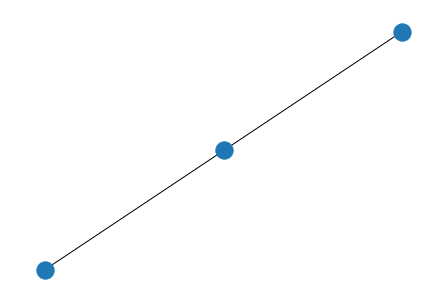

In [5]:
nx.draw(G)

En caso de necesitar el nombre de los vértices, podemos usar la función <code>draw_networkx(G)</code> de <code>networkx</code>:

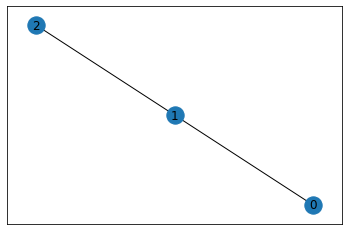

In [6]:
nx.draw_networkx(G)

¿Y si nuestro grafo tiene vértices aislados? Bueno, para estos casos existe el método <code>add_node(v)</code> de la clase <code>Graph</code>, donde <code>v</code> es el vértice a agregar. Por ejemplo, agreguemos un vértice aislado a $P_3$ de nombre 3:

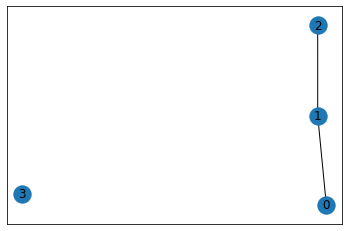

In [7]:
G.add_node(3)
nx.draw_networkx(G)

Por supuesto también tenemos métodos para remover vértices y aristas, <code>remove_node(v)</code> y <code>remove_edge(u,v)</code> de la clase <code>Graph</code>, respectivamente. Por ejemplo, borremos el vértice que acabamos de agregar:

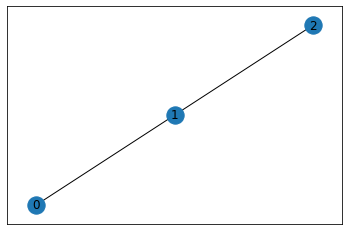

In [8]:
G.remove_node(3)
nx.draw_networkx(G)

También es posible construir un grafo en una única línea, mediante el método <code>add_edges_from(aristas)</code> de la clase <code>Graph</code>, donde <code>aristas</code> es una lista con las aristas del grafo. Para poder reutilizar la variable de python <code>G</code>, previamente tenemos que limpiar el grafo anterior mediante el método <code>clear()</code> de la clase <code>Graph</code>, de lo contrario podemos reinsertar aristas.

In [9]:
G.clear()
G.add_edges_from([(0,1),(1,2)])

### &#x1f4bb; Actividad 1 

Construir el grafo <a href="https://mathworld.wolfram.com/SunGraph.html">3-sol (figura de la izquierda)</a>.

In [10]:
# Celda para resolver la actividad 1

### Generadores de grafos 

El paquete <code>networkx</code> nos ofrece una gran cantidad de funciones predefinidas para generar grafos particulares, con nombre y apellido. Veamos algunos ejemplos.

In [11]:
n = 5                           # Numero de vertices
P5 = nx.path_graph(n)           # Camino de n vartices
K5 = nx.complete_graph(n)       # Completo de n vartices
C5 = nx.cycle_graph(n)          # Ciclo de n vertices
S5 = nx.star_graph(n)           # Estrella de n+1 vertices
Petersen = nx.petersen_graph()  # Petersen
LS5 = nx.line_graph(S5)         # Grafo de linea de la 5-estrella

Etc, etc, etc... Tenemos infinidad de generadores ya predefinidos. Siempre es recomendable revisar el listado de <a href="https://networkx.org/documentation/stable/reference/generators.html">generadores</a> antes de construir un grafo por nuestros propios medios. 

### &#x1f4bb; Actividad 2

Elegir algún generador diferente a los presentado previamente y usarlo para construir un grafo. Incluir también una gráfica del mismo.

In [40]:
# Celda para resolver la actividad 2

### Funciones

Ya sabemos generar grafos, pero falta averiguar qué podemos hacer con ellos. Usaremos como ejemplo un grafo aleatorio. Los grafos aleatorios son muy útiles para evaluar algoritmos sobre entradas sin ninguna estructura particular. El paquete <code>networkx</code> nos ofrece la función <code>erdos_renyi_graph(n,p)</code> para generar un grafo aleatorio con $n$ vértices y densidad (apróximadamente) $p$. Internamente, esta función comienza con un grafo sin aristas con $n$ vértices y agrega con probabilidad $p$ una arista entre todo par de vértices. 

A continuación generamos y graficamos un grafo aleatorio con 10 vértices y probabilidad de arista 0.8, y lo almacenamos en una variable de python de nombre <code>R</code>. El parámetro <code>seed=0</code> nos garantiza que múltiples ejecuciones de esa celda, generarán exactamente el mismo grafo.

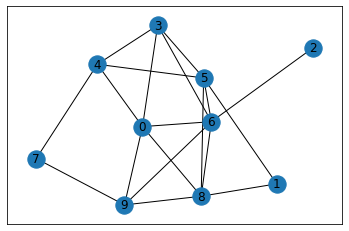

In [12]:
R = nx.erdos_renyi_graph(10,0.5,seed=0)
nx.draw_networkx(R)

#### Número de vértices, aristas, densidad, grados y adyacencias

La clase <code>Graph</code> nos provee de los métodos <code>number_of_nodes()</code> y <code>number_of_edges()</code> para saber el número de vértices y aristas, respectivamente, del grafo.

In [13]:
R.number_of_nodes()

10

In [14]:
R.number_of_edges()

19

También nos provee la función <code>density(G)</code> para conocer la densidad del grafo $G$ (es decir, el cociente entre el número de aristas de $G$ y el número de aristas que posee un grafo completo con la misma cantidad de vértices). En los casos extremos una densidad de 0 represeta un grafo sin aristas, y una densidad de 1 a un grafo completo. Observar que la densidad es aproximdamente igual a la probabilidad de arista que usamos para la generación, y estos valores tenderán a coincidir a medida que aumentamos el tamaño del grafo.

In [15]:
nx.density(R)

0.4222222222222222

El método <code>degree(v)</code> de la clase <code>Graph</code> nos devuelve el grado del vértice $v$. Por ejemplo, para el vértice 0 tenemos:

In [16]:
R.degree(0)

5

También será util saber si dos vértices son o no adyacentes. Disponemos del método <code>has_edge(u,v)</code> de la clase <code>Graph</code> que determina si $u$ y $v$ son adyacentes. Por ejemplo:

In [17]:
R.has_edge(0,1)

False

In [18]:
R.has_edge(0,4)

True

#### Iteradores

En muchas situaciones, al programar es necesario iterar sobre los vértices del grafo. Por ejemplo, supongamos que queremos escribir una función que determine si algún vértice tiene grado mayor a un número dado $k$. Esto es muy sencillo, podemos iterar sobre los vértices de la siguiente forma:
<p><code>for v in R:
    ...</code></p>
   
Es decir, <code>v</code> es una variable de python que almacenará el vértice en cada iteración del bucle y <code>R</code> es el nombre del grafo que habíamos generado anteriormente. Por ejemplo, supongamos que simplemente queremos recorrer todos los vértices e imprimirlos:

In [19]:
for v in R:
    print(v)

0
1
2
3
4
5
6
7
8
9


Con esta idea, podemos escribir la función que buscabamos de la siguiente forma:

In [20]:
def tiene_grado_mayor_a(G,k):
    for v in G:
        if G.degree(v) > k:
            return True
    return False

Para testear esta función, podemos aplicarla sobre nuestro grafo <code>R</code> previamente construido:

In [21]:
tiene_grado_mayor_a(R,2)

True

Por el contrario, si pedimos un grado demasiado alto:

In [22]:
tiene_grado_mayor_a(R,9)

False

Probemos definir una función más útil. Recordemos que un grafo $G$ es euleriano si y solo si todos sus vértices tiene grado par. Por lo tanto podemos definir una función <code>es_euleriano(G)</code> que determine si $G$ es euleriano simplemente iterando sobre los vértices y viendo la paridad de sus grados:

In [23]:
# Función que determina si un número es par
def es_par(n):
    return (n % 2) == 0 # Tiene resto 0 en la division por 2? 

def es_euleriano(G):
    for v in G:
        if not es_par(G.degree(v)):
            return False 
    return True

Algunos casos de prueba para nuestra función:

In [24]:
es_euleriano(Petersen)

False

In [25]:
es_euleriano(K5)

True

También es posible iterar sobre los vecinos de un vértice $v$, mediante el método <code>neighbors(v)</code> de la clase <code>Graph</code>. Por ejemplo, iteremos sobre los vecinos de 0 en el grafo $R$ e imprimámoslos uno por uno.

In [26]:
for v in R.neighbors(0):
    print(v)

3
4
6
8
9


Finalmente, también es posible iterar sobre las aristas del grafo. Esto se hace de la siguiente forma:
<p><code>for u,v in R.edges:
    ...</code></p>

Es decir, <code>u</code> y <code>v</code> son variables de python que almacenarán los extremos de la arista en cada iteración del bucle y <code>R.edges</code> es la lista con todas las aristas del grafo anterior. Por ejemplo, supongamos que simplemente queremos recorrer todas las aristas e imprimirlas:

In [27]:
for u,v in R.edges:
    print(u,v)

0 3
0 4
0 6
0 8
0 9
1 5
1 8
2 6
3 4
3 5
3 6
4 5
4 7
5 6
5 8
6 8
6 9
7 9
8 9


### &#x1f4bb; Actividad 3

Implementar una función <code>es_clique(G,C)</code> que dados un grafo $G$ y una lista $C$ de vértices de $G$, determine si $C$ representa una clique (subconjunto de vértices mutuamente adyacentes) de $G$. En este notebook no se preocupe por el manejo de errores, por ejemplo si $C$ tiene un vértice que no pertence a $G$, y deje que python maneje los errores a su forma.

In [28]:
# Celda para completar actividad 3

def es_clique(G, C):
    # Completar ...
    return True

Una vez implementada la función, puede ejecutar los siguientes casos de prueba y analizar si el resultado es el esperado:

In [29]:
es_clique(C5,[0,1])

True

In [30]:
es_clique(C5,[0,1,2])

True

### &#x1f4bb; Actividad 4

Escribir una función <code>maximalizar_clique(G,C)</code> que dados un grafo $G$ y una clique $C$ de $G$ (que puede estar inicialmente vacía), retorna una clique maximal $M$ de $G$ que contiene a $C$. Puede representar a $C$ y $M$ con listas de python.

<b>Ayuda.</b> En caso de que la cosa se complique, puede intentar traducir el siguiente pseudocódigo a python:
<p><code>M <- copia de C
para todo vertice v de G:
     si v no esta en M:
         ok <- True
         para todo vertice u de M:
             if v y u no son adyacentes en G:
                 ok <- False
         si ok es True:
             insertar v en M 
retornar M
</code></p>
    
La idea es iterar sobre cada vértice de G que no esté en la clique, chequear que no sea adyacentes a ningún vértice de la clique y en ese caso insertarlo en la clique.

In [31]:
# Celda para completar la actividad 4

def maximalizar_clique(G, C):
    M = list(C) # Copiar la lista C
    # Completar ...
    # Recordar que M.append(v) inserta a v en la lista M
    return M

Una vez implementada la función, puede ejecutar los siguientes casos de prueba y analizar si el resultado es el esperado:

In [32]:
maximalizar_clique(C5,[])

[]

In [33]:
maximalizar_clique(K5,[])

[]

In [34]:
maximalizar_clique(Petersen,[5])

[5]

### &#x1f4bb; Actividad 5

<b>Definición.</b> Sea $G$ un grafo, un coloreo de $G$ es una función $f$ que asigna a cada vértice de $G$ un color tal que vértices adyacentes tengan asignados colores distintos, es decir, para toda arista $(u,v)$ de $G$, $f(u) \neq f(v)$.

Típicamente se asume que los colores son números naturales.

<b>Ejemplo.</b> Un coloreo para el grafo camino de 3 vértices $P_3$ puede ser: $$f(0) = 0$$ $$f(1) = 1$$ $$f(2) = 0$$ 

En python podemos representar un coloreo mediante un diccionario. Un diccionario se puede inicializar en python de la siguiente forma. Es decir, se escribe cada vértice seguido por dos puntos y su color, entre llaves y separados por comas.

In [35]:
f = {0: 0, 1: 1, 2: 0}

Podemos consultar el color asignado a un vértice de la siguiente forma, por ejemplo para el vértice 2:

In [36]:
f[2]

0

La actividad propuesta consiste en implementar una función <code>es_coloreo(G,f)</code> que tome como argumentos un grafo $G$ y un diccionario $f$, y determine si $f$ es un coloreo de $G$

In [37]:
# Celda para completar la actividad 4

def es_coloreo(G,f):
    return True

Escriba sus propios casos de prueba para la función.

### Algoritmos

Ya hemos visto las funciones básicas de <code>networkx</code>, mediante las cuales podremos construir todo lo que necesitaremos en el curso. Sin embargo, muchos algoritmos que usamos habitualmente en teoría de grafos ya se encuentran implementados en este paquete, lo que nos ahorrará mucho tiempo.

Volviendo a las actividades anteriores, disponemos de una función <code>find_cliques(G)</code> que devuelve todas las cliques maximales de $G$:

In [38]:
for C in nx.find_cliques(Petersen):
    print(C)

[0, 1]
[0, 4]
[0, 5]
[2, 1]
[2, 3]
[2, 7]
[3, 8]
[3, 4]
[6, 8]
[6, 1]
[6, 9]
[7, 9]
[7, 5]
[8, 5]
[9, 4]


Otro ejemplo, es la función <code>dominating_set(G)</code> que devuelve un conjunto dominante de $G$. Por ejemplo, en el grafo de petersen:

In [39]:
nx.dominating_set(Petersen)

{0, 2, 6}

Obviamente sería imposible abarcar en este notebook todos los algoritmos que <code>networkx</code> trae predefinidos. La sugerencia siempre es mirar el listado de <a href="https://networkx.org/documentation/stable/reference/algorithms/index.html">algoritmos</a> disponibles antes de programar uno por cuenta propia.

### &#x1f4bb; Actividad 6

Investigar los algoritmos implementados en <code>networkx</code>, elegir alguno diferente a los presentado previamente y usarlo sobre algún grafo.

In [41]:
# Celda para resolver la actividad 6